In [13]:
library(ggplot2)

In [14]:
data = read.csv("reddit.csv")

In [15]:
table(data$age.range)


      18-24       25-34       35-44       45-54       55-64 65 or Above 
      15802       11575        2257         502         140          60 
   Under 18 
       2330 

In [16]:
levels(data$age.range)

[1] "18-24"       "25-34"       "35-44"       "45-54"       "55-64"      
[6] "65 or Above" "Under 18"

In [17]:
data$age.range = factor(data$age.range, levels(data$age.range)[c(7,1:6)])

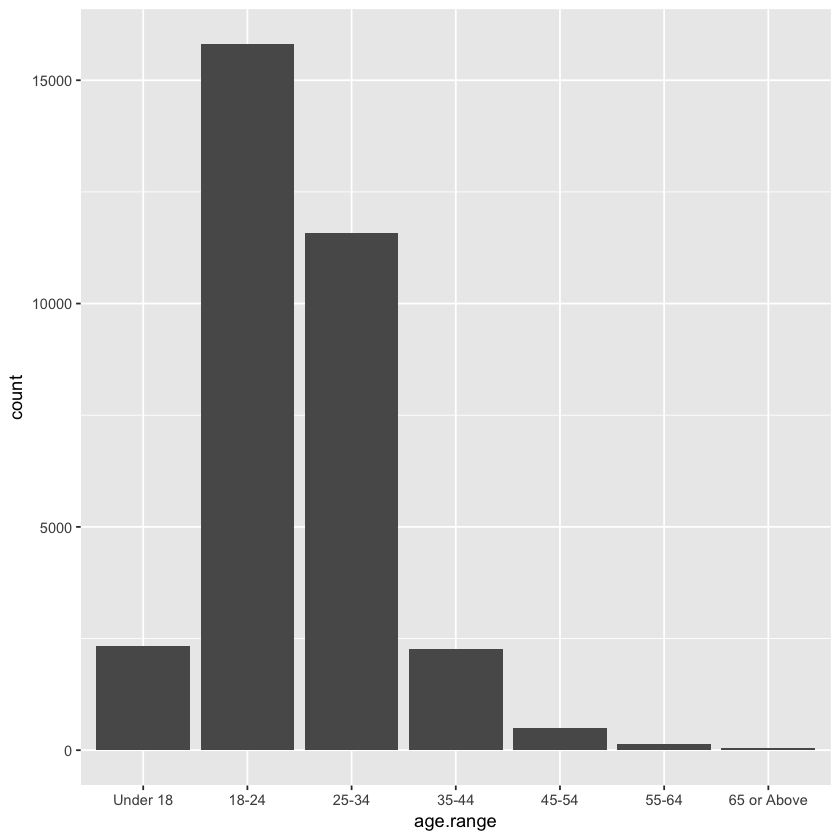

In [18]:
new_data = data[!is.na(data$age.range),]
ggplot(new_data, aes(x = age.range)) + geom_bar()

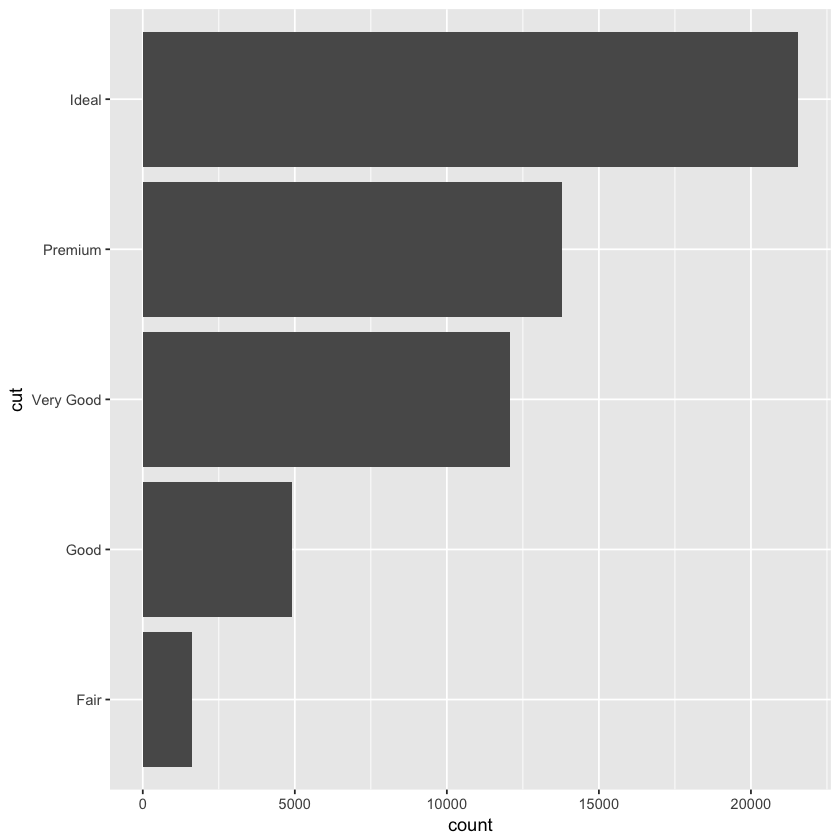

In [19]:
ggplot(diamonds, aes(x = cut)) +
geom_bar() + coord_flip()

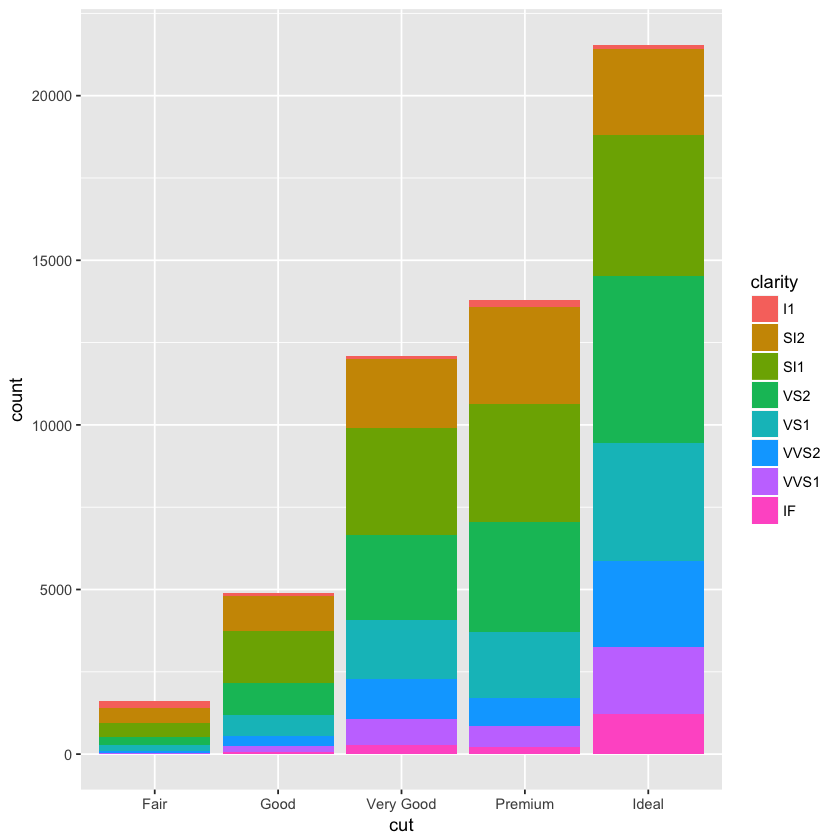

In [21]:
ggplot(diamonds, aes(x = cut, fill = clarity)) +
geom_bar()

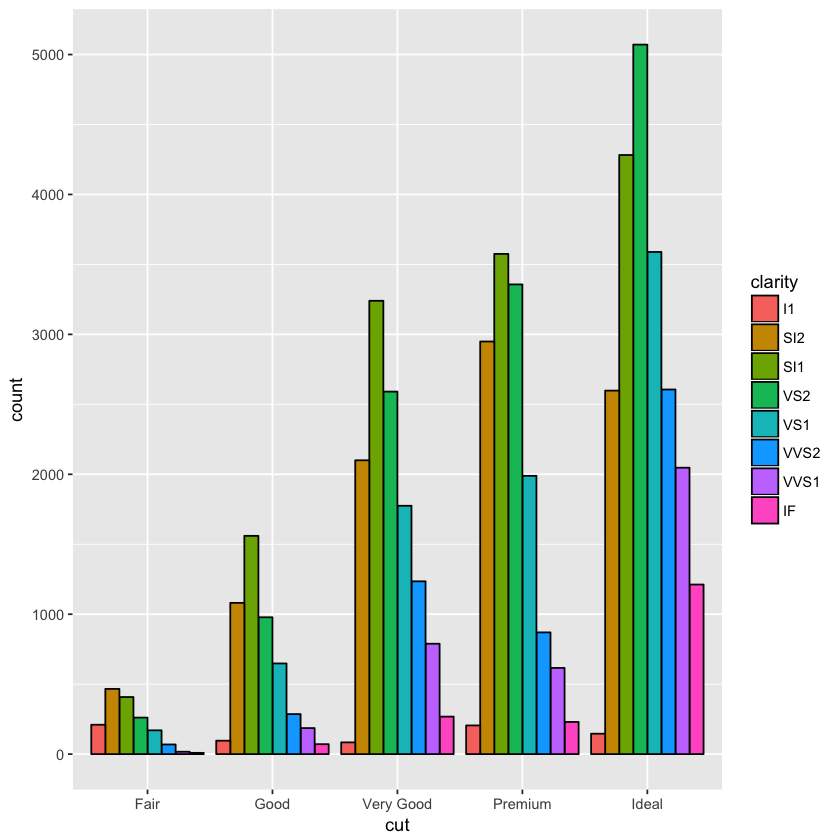

In [22]:
ggplot(diamonds, aes(x = cut, fill = clarity)) +
geom_bar(position = "dodge", color = "black")

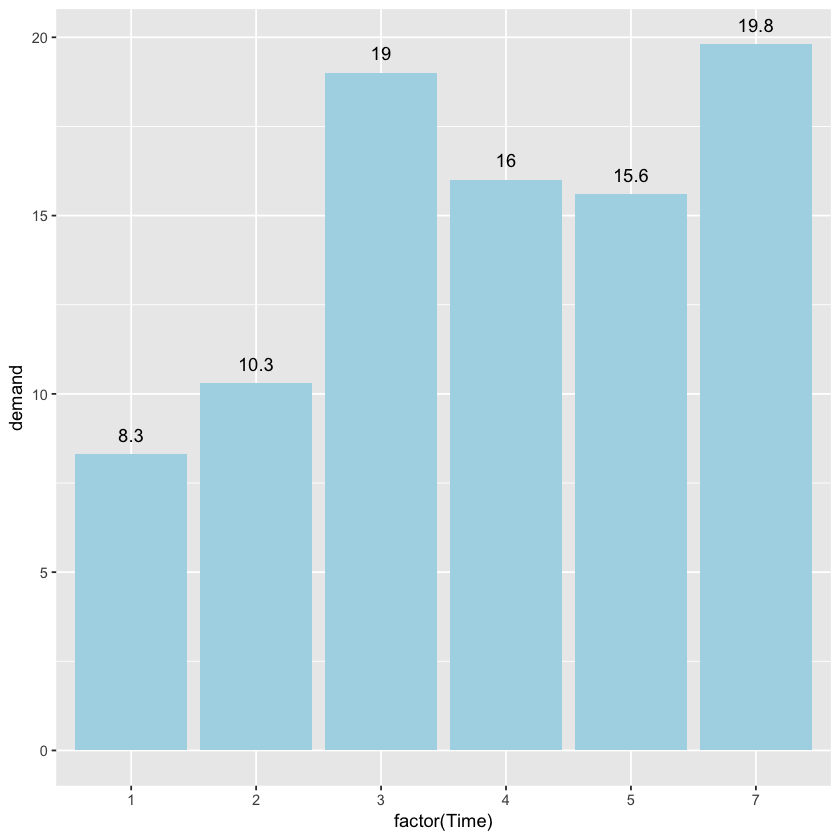

In [23]:
ggplot(BOD, aes(x = factor(Time), y = demand)) +
geom_bar(stat = "identity", fill = "lightblue") + geom_text(aes(label = demand), vjust = -1)

In [25]:
install.packages('gcookbook')
library(gcookbook)

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [29]:
data = uspopchange[order(-uspopchange$Change),] # - means in descending order head(data,10)
data = subset(uspopchange, rank(Change) >40)

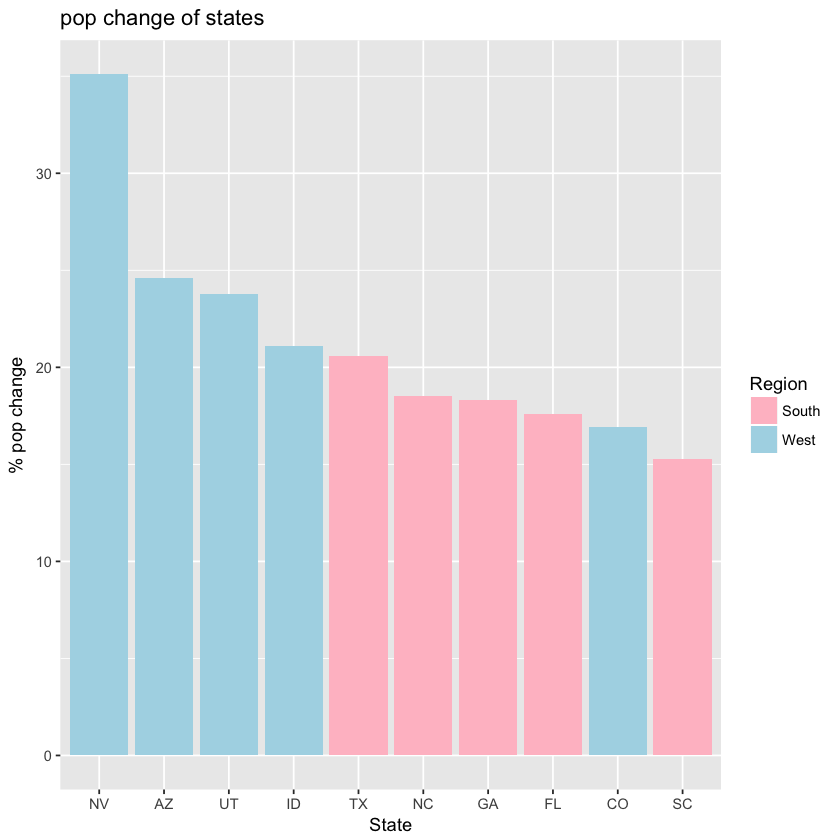

In [32]:
ggplot(data,aes(x = reorder(Abb, -Change), y = Change, fill = Region)) +
geom_bar(stat = "identity") +
xlab("State") +
ylab("% pop change") +
ggtitle("pop change of states") + scale_fill_manual(values = c("pink", "lightblue"))

In [36]:
data = subset(climate, Source == 'Berkeley' & Year >= 1900)
data$pos = data$Anomaly10y >0

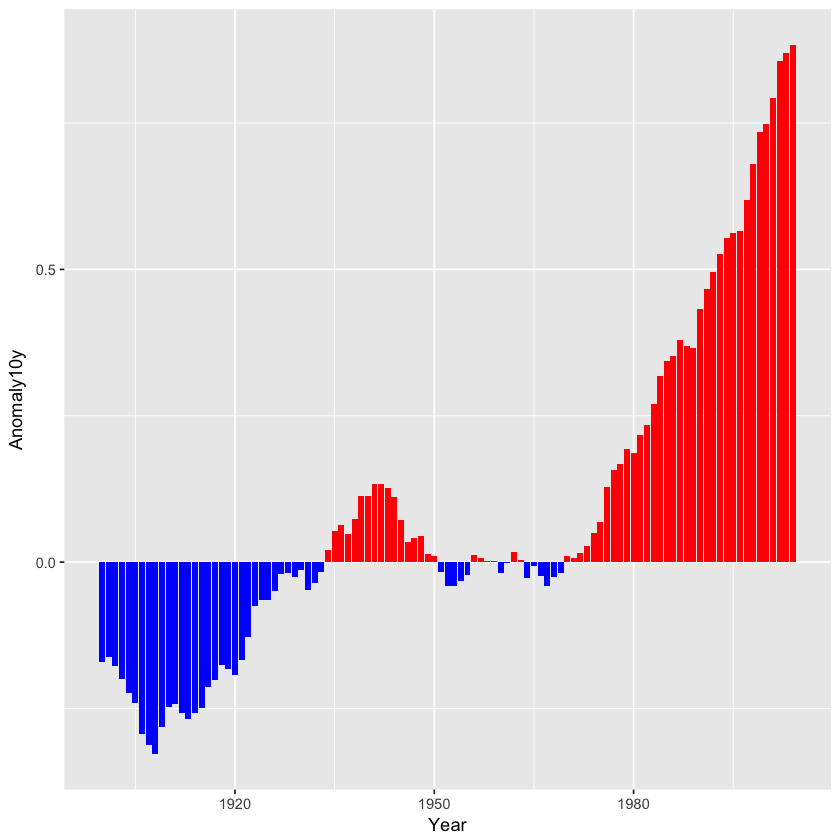

In [37]:
ggplot(data,aes(x = Year, y = Anomaly10y, fill = (Anomaly10y >0))) +
geom_bar(stat = "identity") +
scale_fill_manual(values = c("blue", "red"), guide = FALSE)

In [57]:
tophit = tophit[order(-tophit$avg),]
tophit25 = tophit[1:25,]

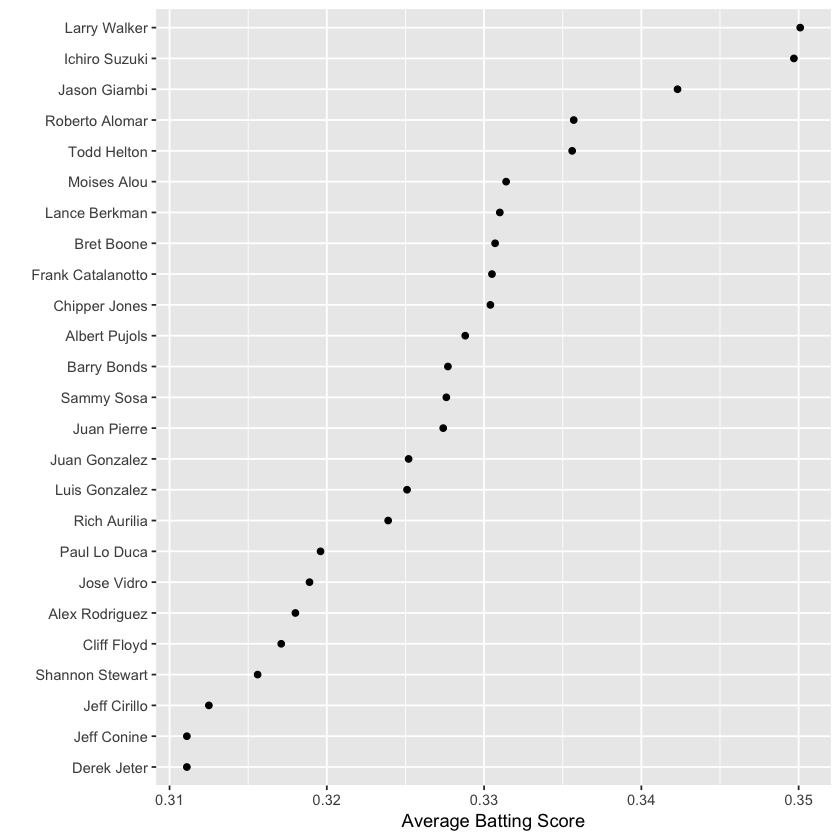

In [58]:
ggplot(tophit25, aes(x = reorder(name,avg), y = avg)) +
geom_point(stat = "identity") + 
coord_flip() +
xlab("") +
ylab("Average Batting Score")

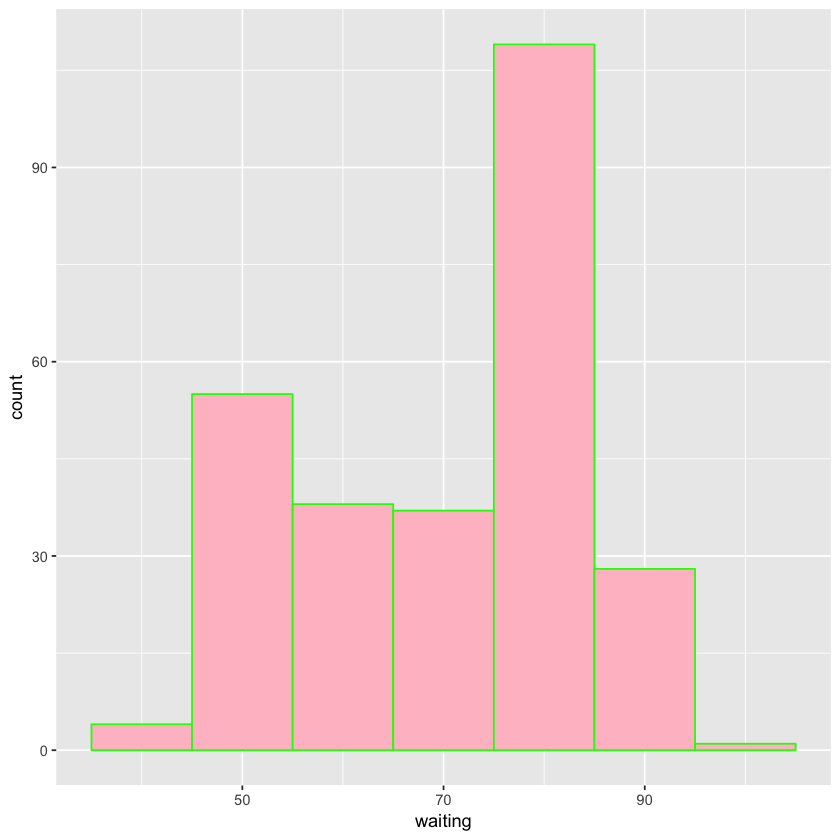

In [40]:
ggplot(faithful, aes(x= waiting)) +
geom_histogram(binwidth = 10, color = "green", fill="pink")

In [49]:
library(MASS)

In [50]:
class(birthwt$smoke)
levels(birthwt$smoke)
birthwt$smoke = factor(birthwt$smoke) 
levels(birthwt$smoke)
levels(birthwt$smoke) = c("No smoke", "Smoke") 

[1] "factor"

[1] "No smoke" "Smoke"

[1] "No smoke" "Smoke"

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


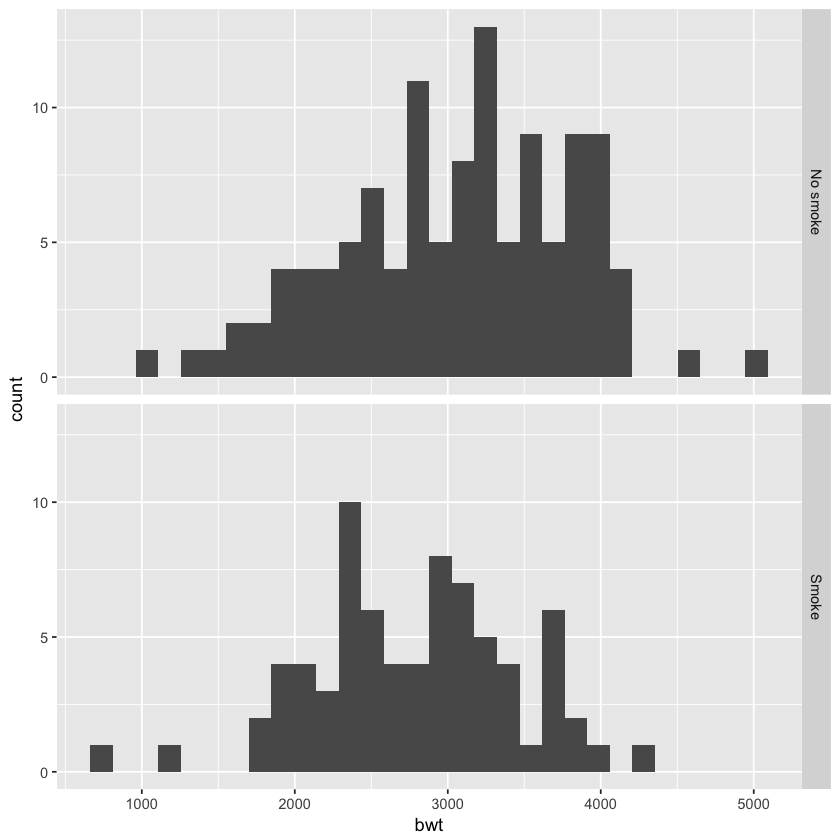

In [51]:
ggplot(birthwt, aes(x = bwt)) +
    geom_histogram() + facet_grid(smoke~.)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


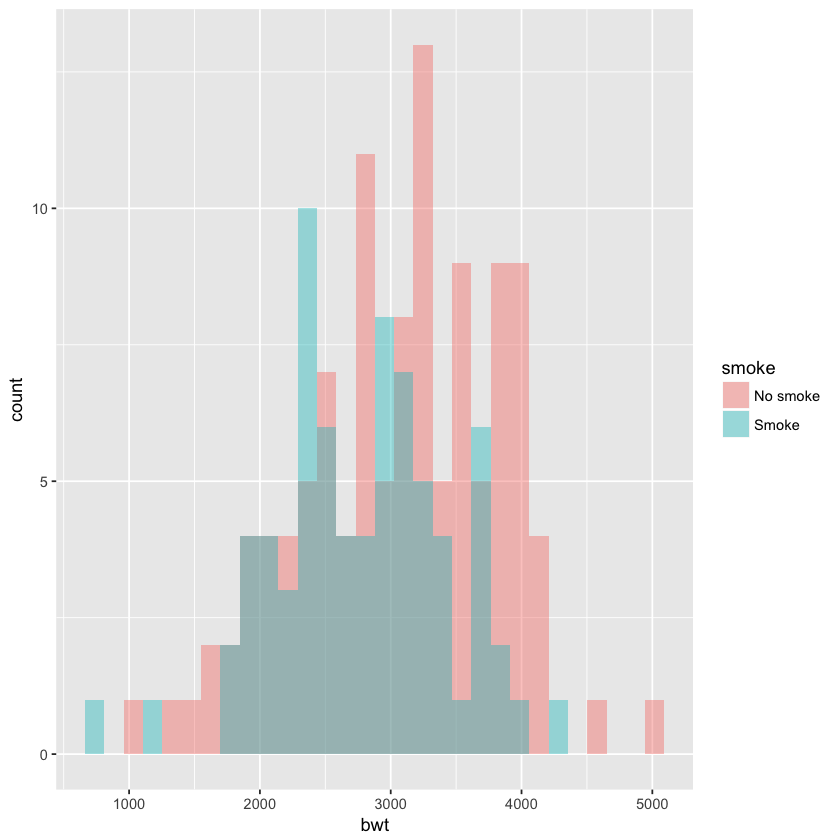

In [52]:
ggplot(birthwt, aes(x = bwt, fill = smoke)) +
    geom_histogram(position = "identity", alpha = 0.4)

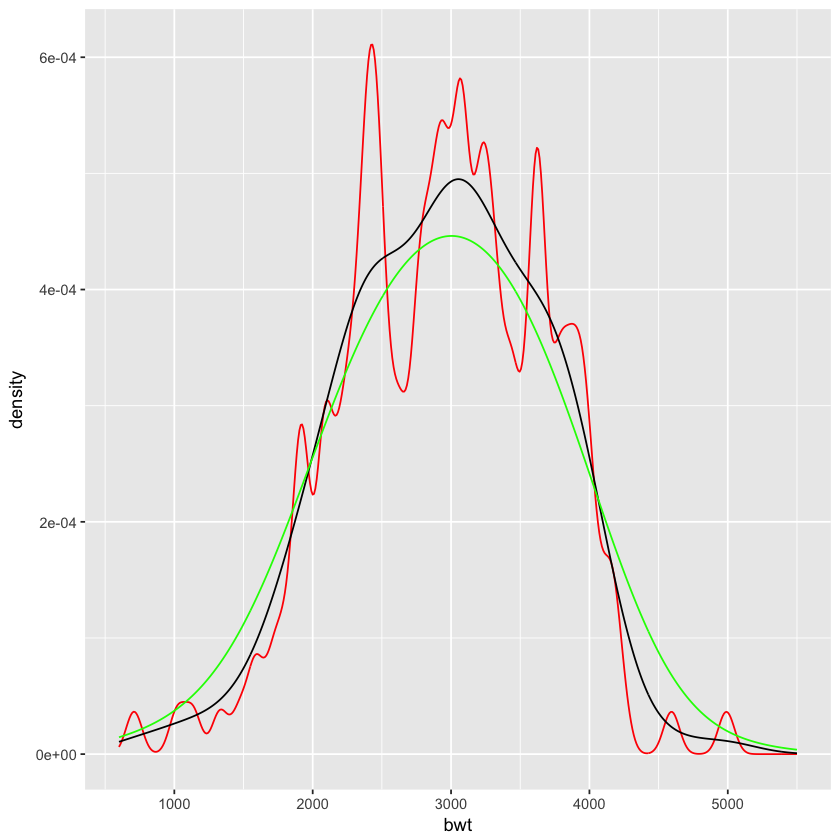

In [53]:
ggplot(birthwt, aes(bwt)) +
geom_line(stat = "density", adjust = 0.25, color = "red") + 
geom_line(stat = "density") +
geom_line(stat = "density", adjust = 2, color = "green") + 
xlim(600, 5500)

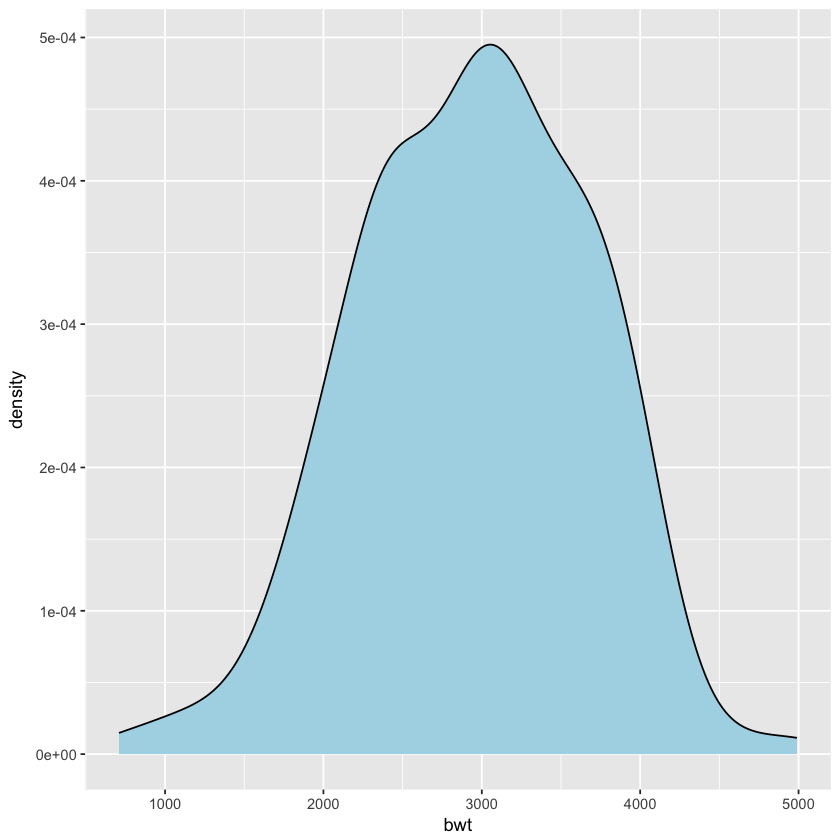

In [55]:
ggplot(birthwt, aes(bwt)) +
geom_density(fill = "lightblue", color = NA) + 
geom_line(stat = "density")

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


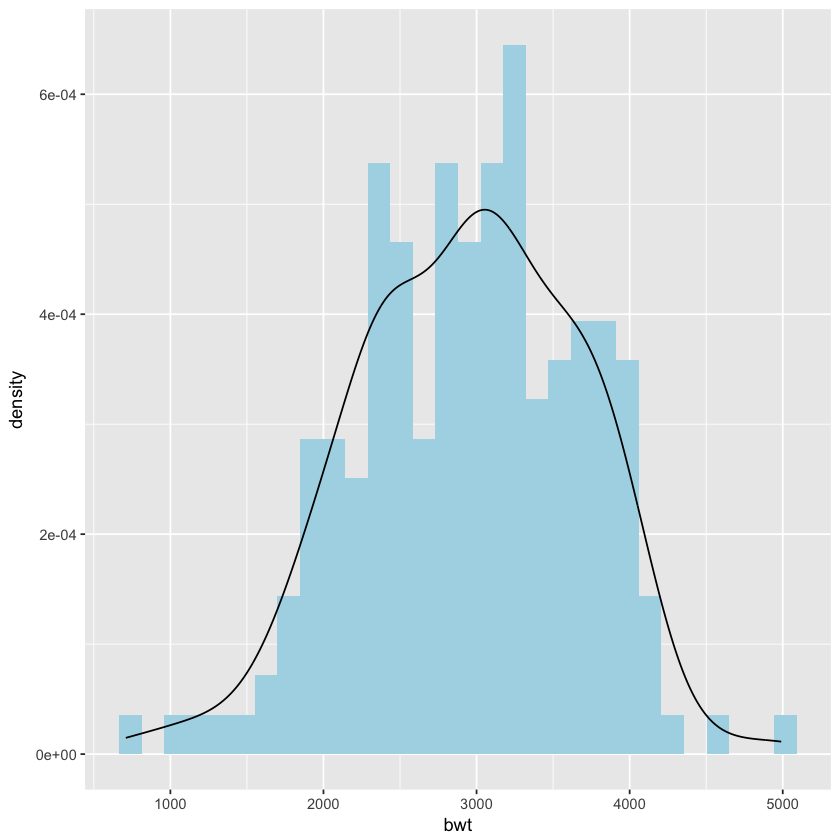

In [56]:
ggplot(birthwt, aes(x = bwt, y = ..density..)) +
geom_histogram(fill = "lightblue") + 
geom_density(color = NA) + 
geom_line(stat = "density")

In [59]:
congress = read.csv("congress.csv")

In [63]:
library(dplyr)

In [62]:
data = filter(congress, party %in% c("D","R"))

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


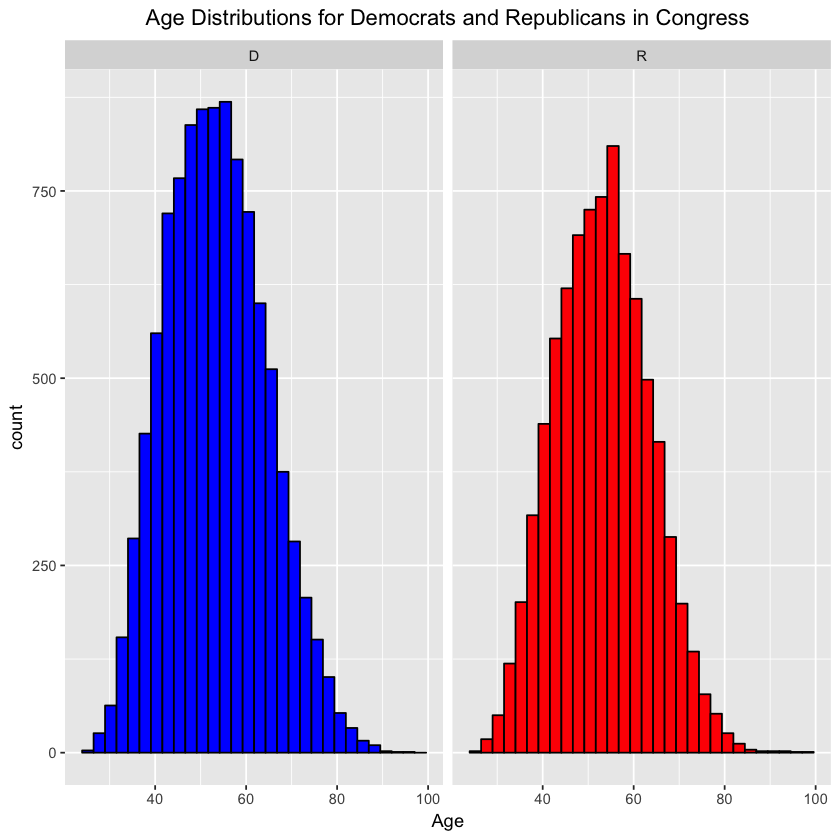

In [64]:
ggplot(data, aes(x = age, fill = party)) +
geom_histogram(color = ("black")) +
facet_grid(.~party) +
scale_fill_manual(values = c("blue", "red"), guide = FALSE) + 
xlab("Age") +
ggtitle("Age Distributions for Democrats and Republicans in Congress") +
theme(plot.title = element_text(hjust = 0.5))

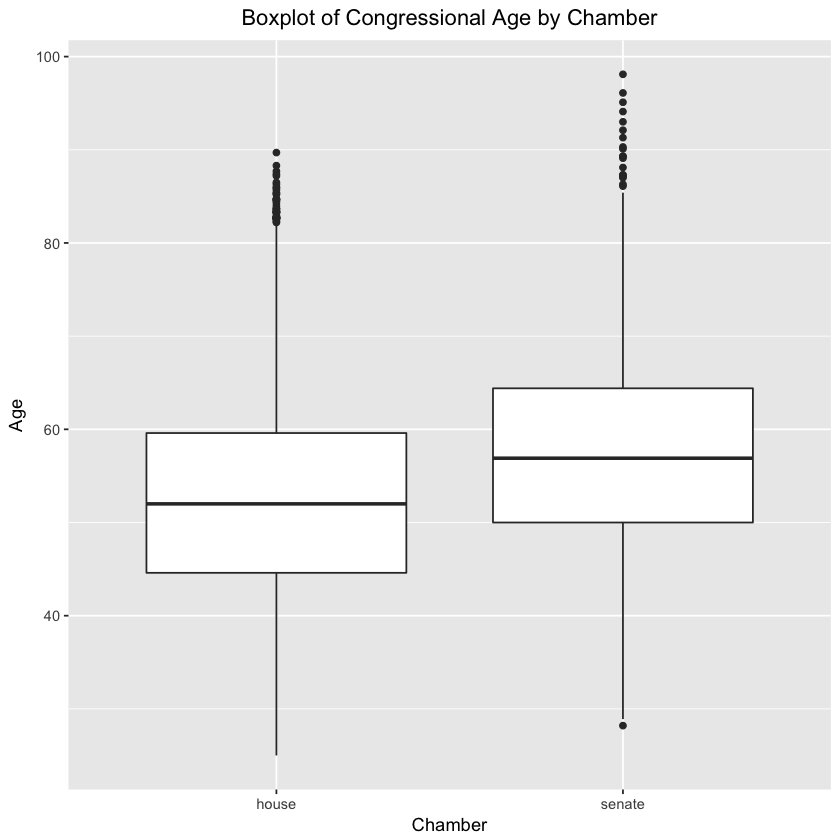

In [65]:
ggplot(data, aes(x = chamber, y = age)) +
geom_boxplot() +
xlab("Chamber") +
ylab("Age") +
ggtitle("Boxplot of Congressional Age by Chamber") + theme(plot.title = element_text(hjust = 0.5))

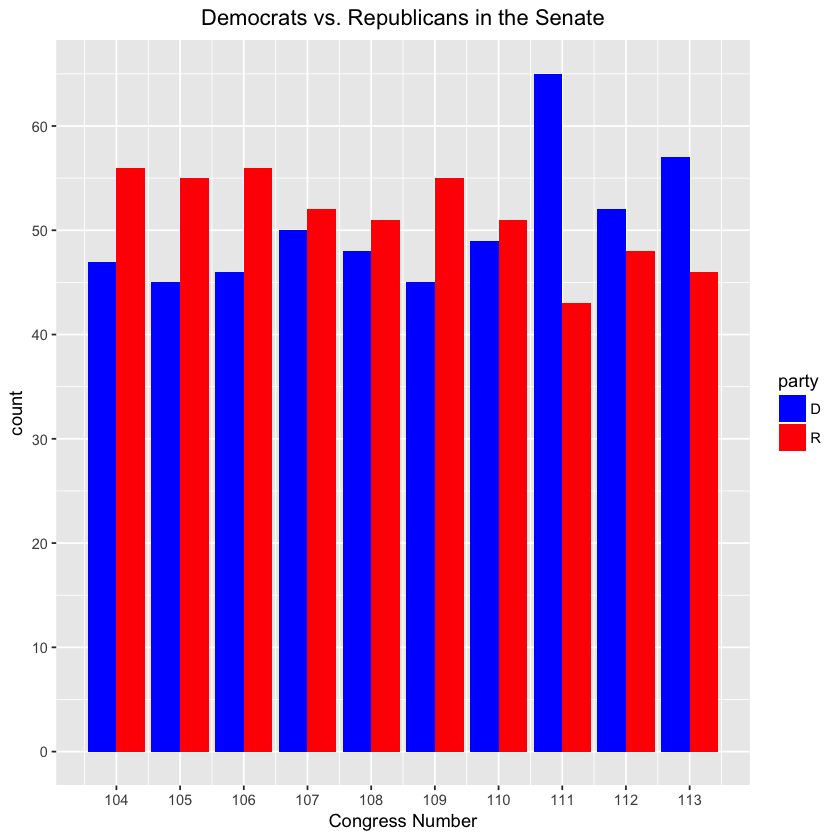

In [67]:
data1 = filter(data, 104 <= congress & congress <= 113 & chamber == "senate")
ggplot(data1, aes(x = congress, fill = party)) + 
geom_bar(position = "dodge") + 
scale_fill_manual(values = c("blue", "red")) + 
xlab("Congress Number") +
ggtitle("Democrats vs. Republicans in the Senate") + 
theme(plot.title = element_text(hjust = 0.5)) + 
scale_x_continuous(breaks = seq(104,113,1)) + 
scale_y_continuous(breaks = seq(0,60,10))

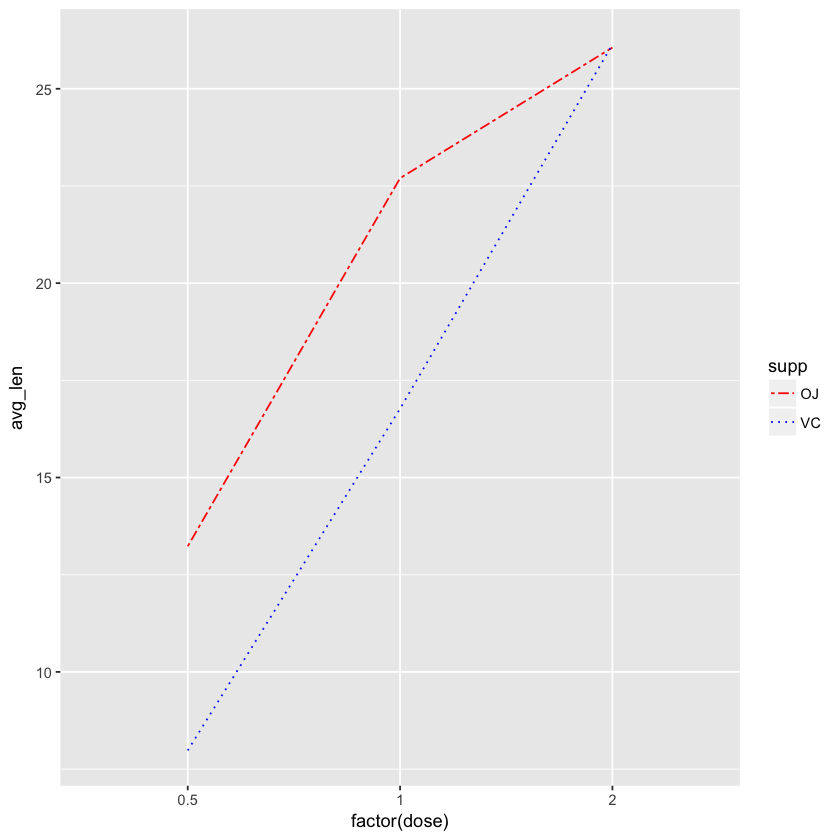

In [69]:
ToothGrowth %>%
group_by(supp, dose) %>% 
summarise(avg_len = mean(len)) %>% 
ggplot(aes(x = factor(dose), y = avg_len, group = supp, color =supp, linetype =supp)) +
geom_line() +
scale_color_manual(values = c("red","blue")) + 
scale_linetype_manual(values = c("twodash", "dotted"))

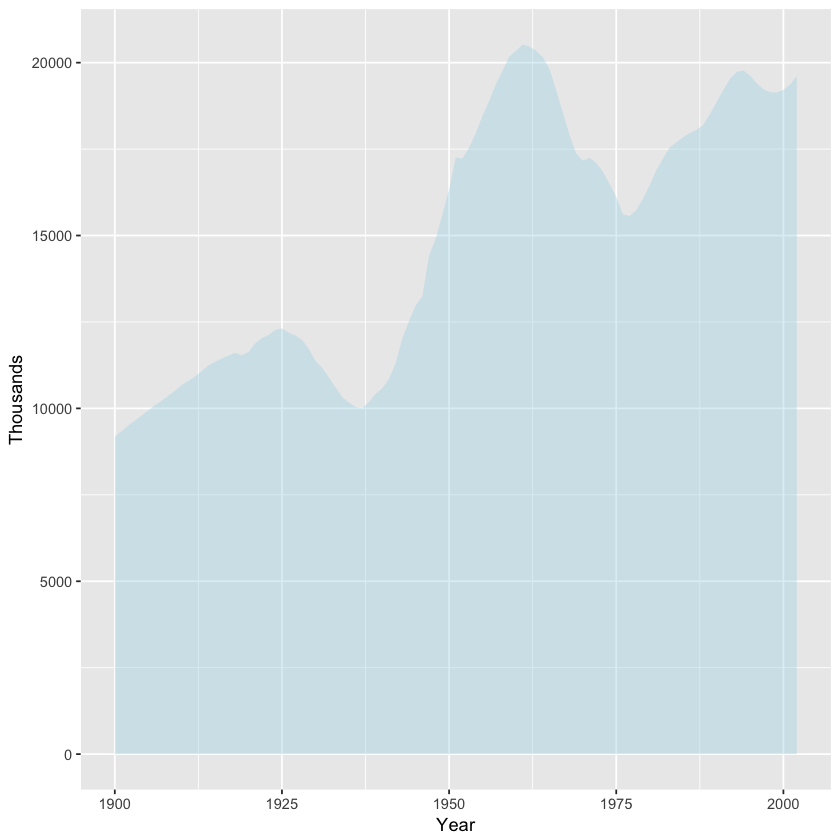

In [70]:
filter(uspopage, AgeGroup == "<5") %>%
ggplot(aes(x = Year, y = Thousands)) + 
geom_area(fill = "lightblue", alpha =0.4)

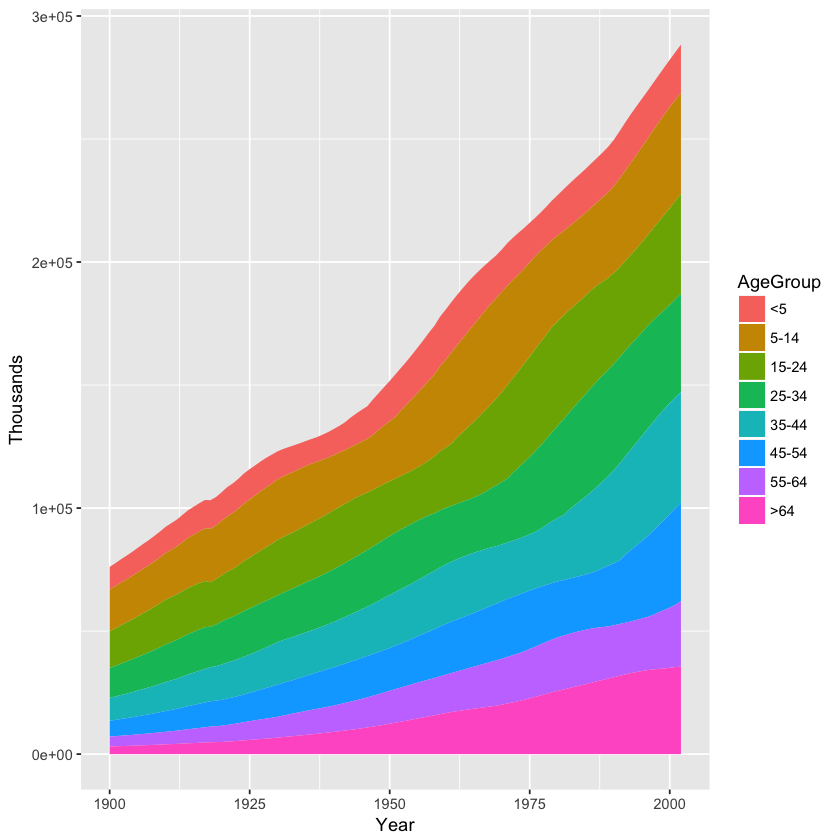

In [71]:
ggplot(uspopage, aes(x = Year, y = Thousands, fill = AgeGroup)) + 
geom_area()

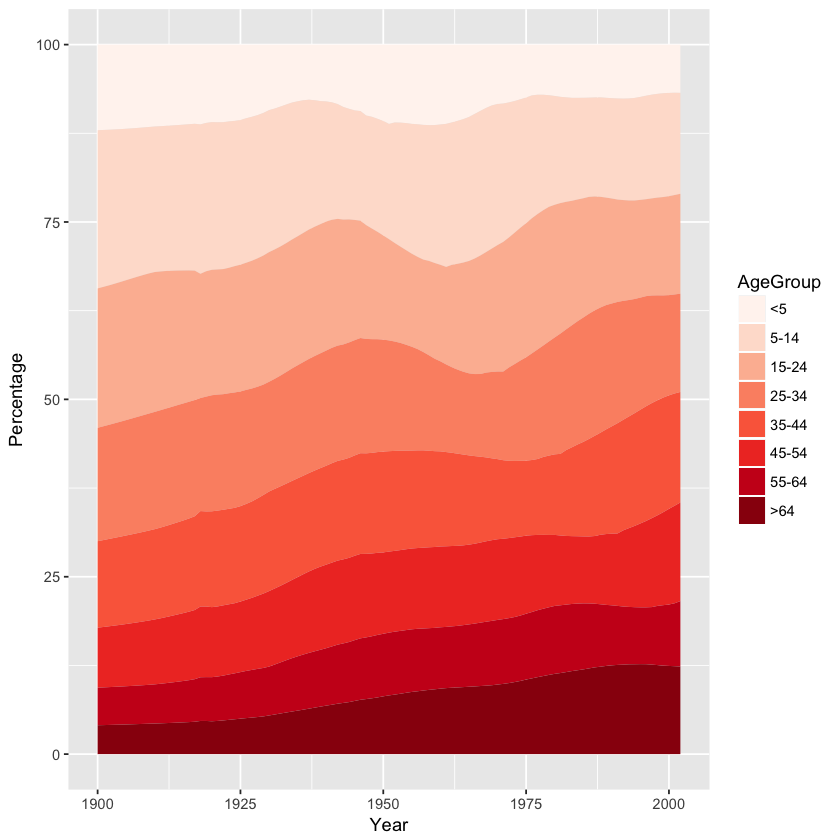

In [72]:
uspopage %>%
group_by(Year) %>%
mutate(Percentage = Thousands/sum(Thousands)*100) %>% 
ggplot(aes(x = Year, y = Percentage, fill = AgeGroup)) + 
geom_area() +
scale_fill_brewer(palette = "Reds", type = "div")

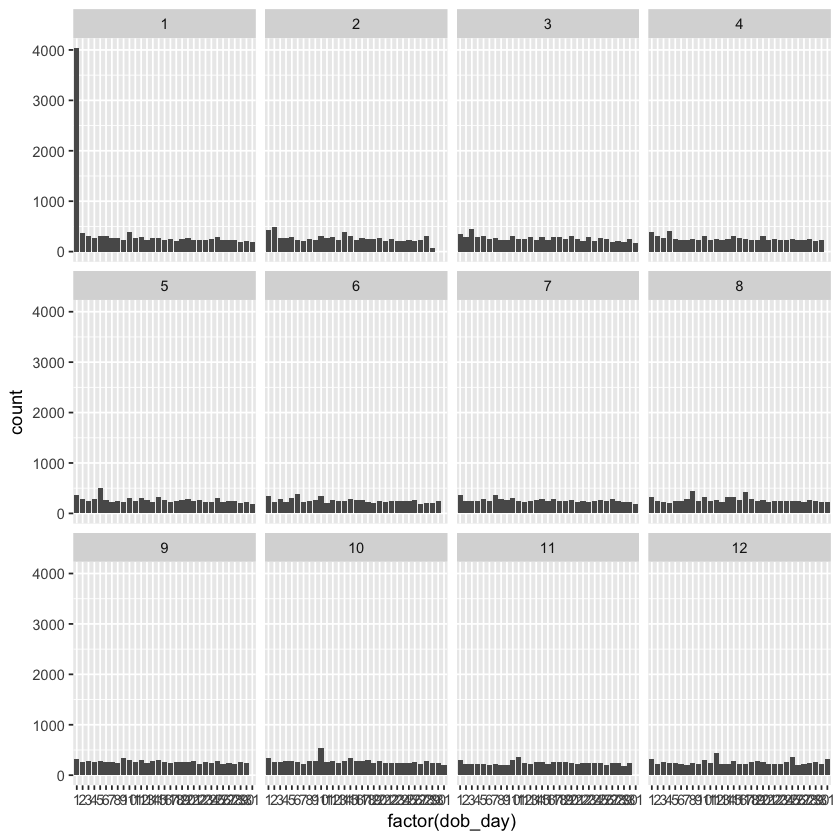

In [73]:
data = read.csv("facebook.tsv", sep = "\t") 
ggplot(data, aes(factor(dob_day))) +
geom_bar() + 
facet_wrap(~dob_month)

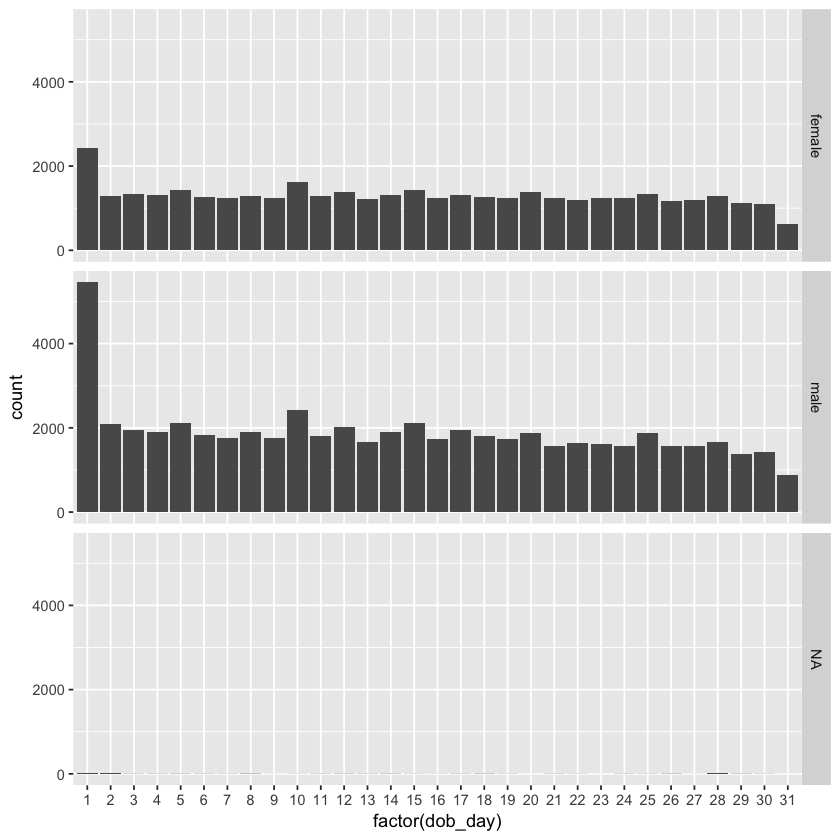

In [74]:
ggplot(data, aes(factor(dob_day))) +
geom_bar() + 
facet_grid(gender~.)

Warning message:
“Removed 2949 rows containing non-finite values (stat_bin).”

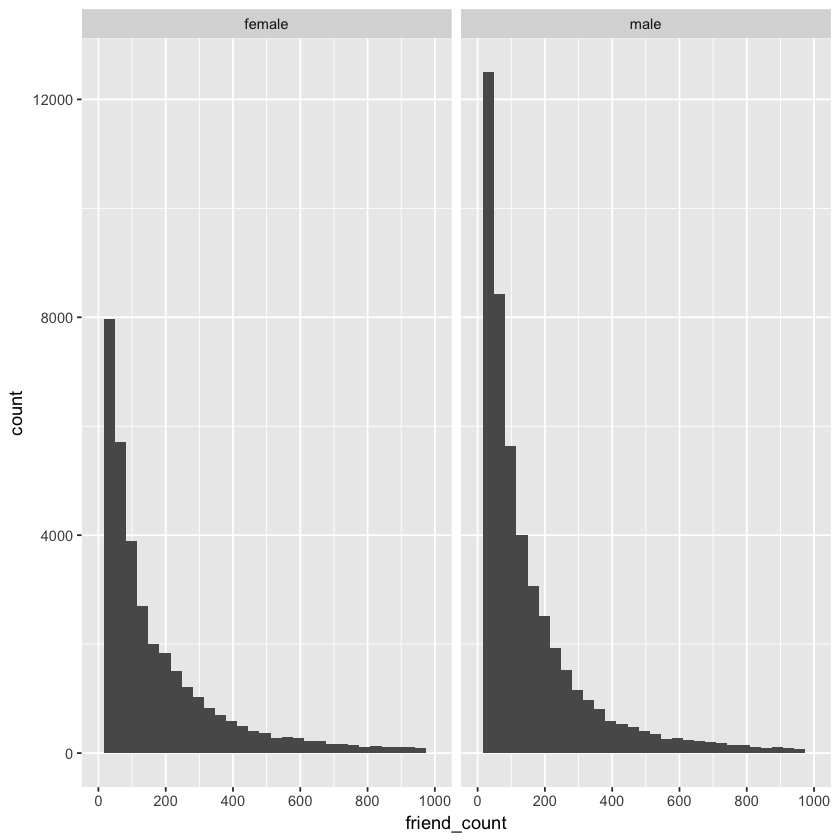

In [75]:
data %>%
filter(!is.na(gender)) %>% 
ggplot(aes(x = friend_count)) +
geom_histogram(binwidth = 33) +
facet_grid(.~gender) +
scale_x_continuous(limits = c(0,1000), breaks = seq(0,1000,200))

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


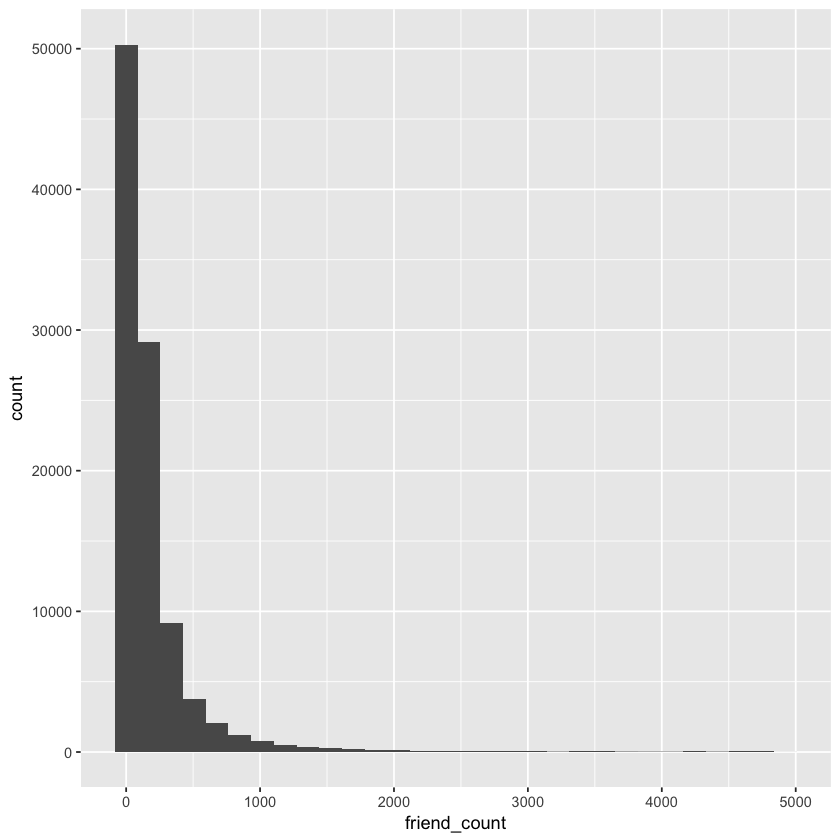

In [76]:
ggplot(data, aes(x = friend_count)) +
geom_histogram()

Warning message:
“Transformation introduced infinite values in continuous x-axis”`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 1962 rows containing non-finite values (stat_bin).”

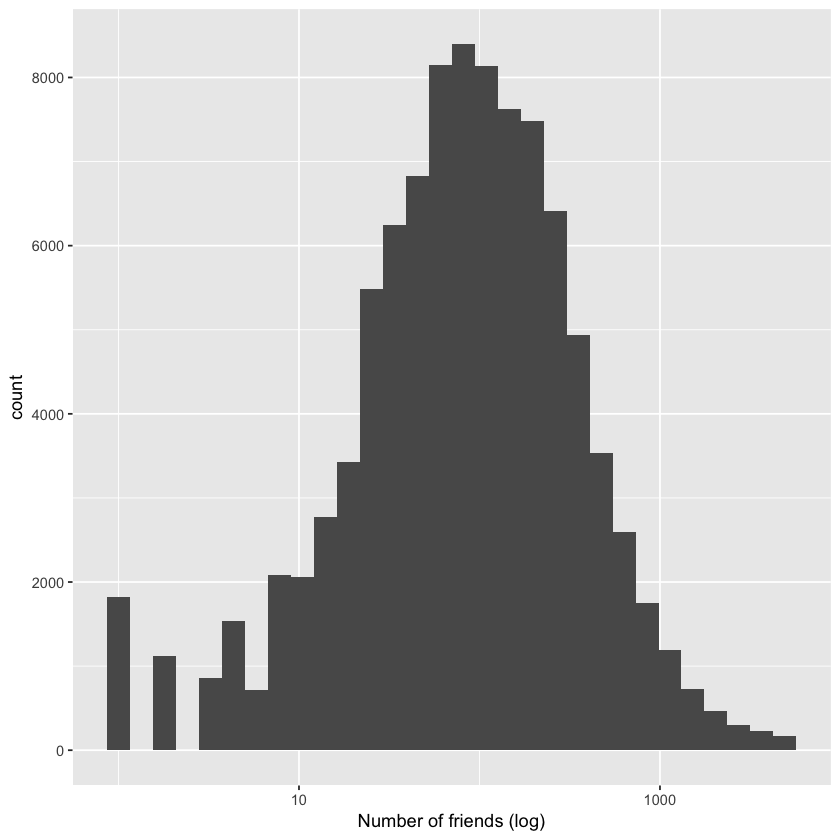

In [77]:
ggplot(data, aes(x = friend_count)) +
geom_histogram() + 
scale_x_log10() +
xlab("Number of friends (log)")

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


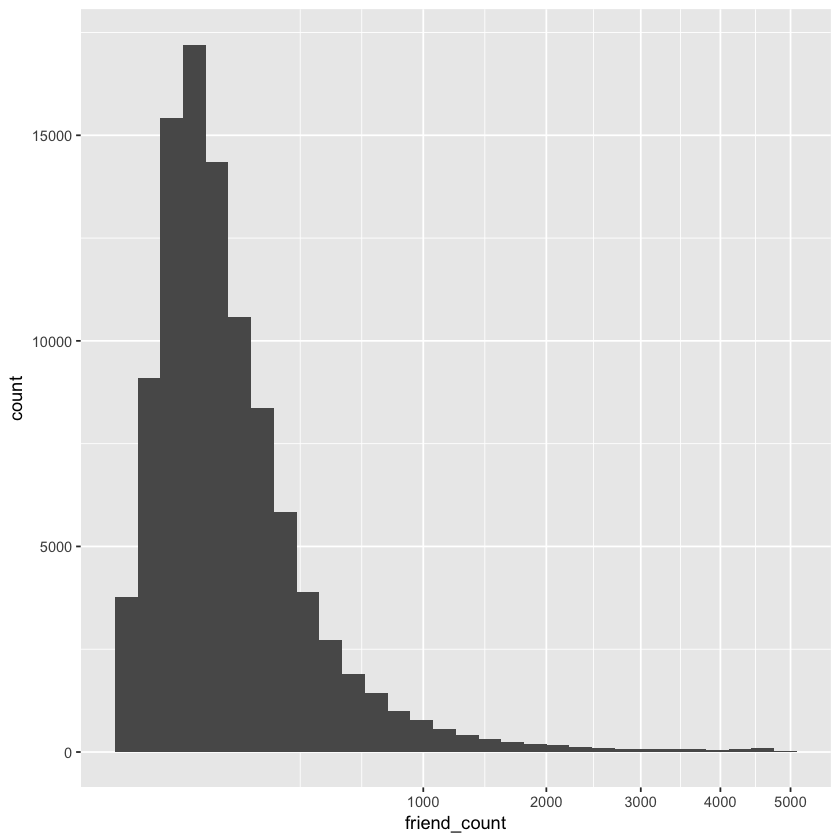

In [78]:
ggplot(data, aes(x = friend_count)) +
geom_histogram() + 
scale_x_sqrt()

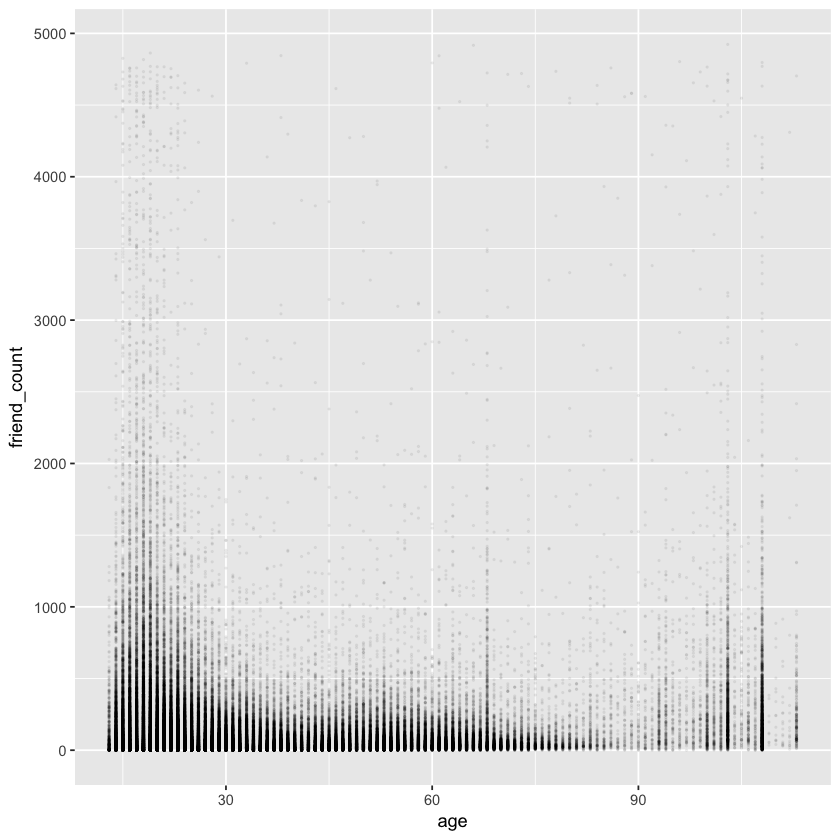

In [79]:
ggplot(data, aes(x = age, y=friend_count)) +
geom_point(size = 0.3, alpha = 1/20)  

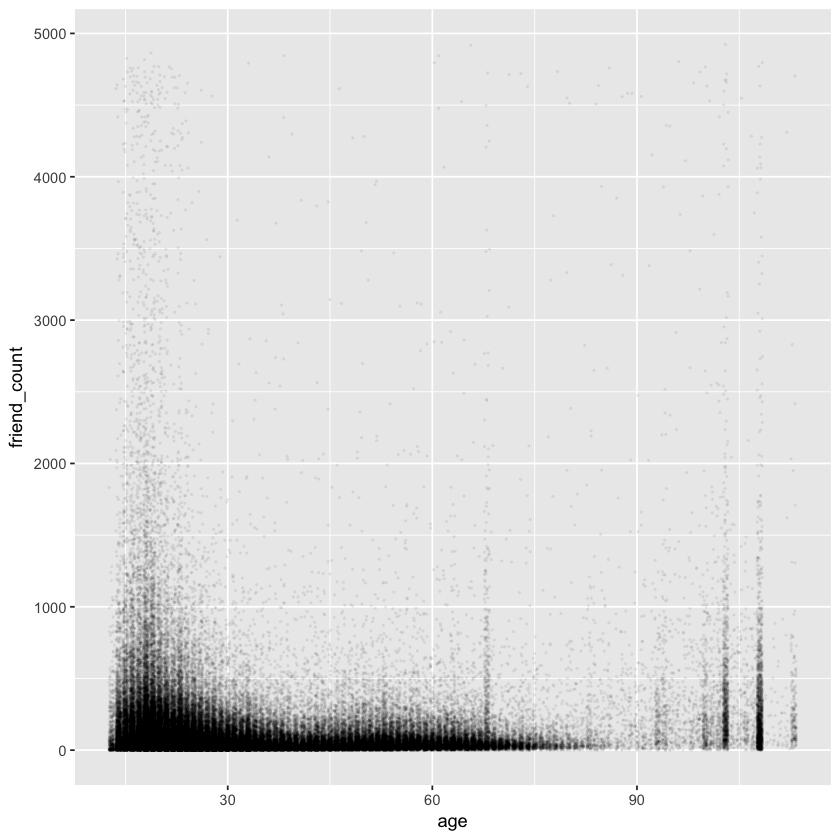

In [80]:
ggplot(data, aes(x = age, y=friend_count)) +
geom_jitter(size = 0.3, alpha = 1/20)

In [81]:
library(lubridate)


Attaching package: ‘lubridate’

The following object is masked from ‘package:base’:

    date



In [84]:
load("collision.rda")

In [85]:
levels(collision$Involved.With)

[1] "Animal"                         "Bicycle"                       
 [3] "Fixed Object"                   "Motor Vehicle on Other Roadway"
 [5] "Non-Collision"                  "Other Motor Vehicle"           
 [7] "Other Object"                   "Parked Motor Vehicle"          
 [9] "Pedestrian"                     "Train"

In [86]:
ped = filter(collision,Involved.With == "Pedestrian")

In [88]:
ped$timestamp = paste(ped$Collision.date, ped$Collision.Time, sep = " ")

In [89]:
ped$timestamp = dmy_hms(ped$timestamp)
ped$weekday = wday(ped$timestamp, label = T)

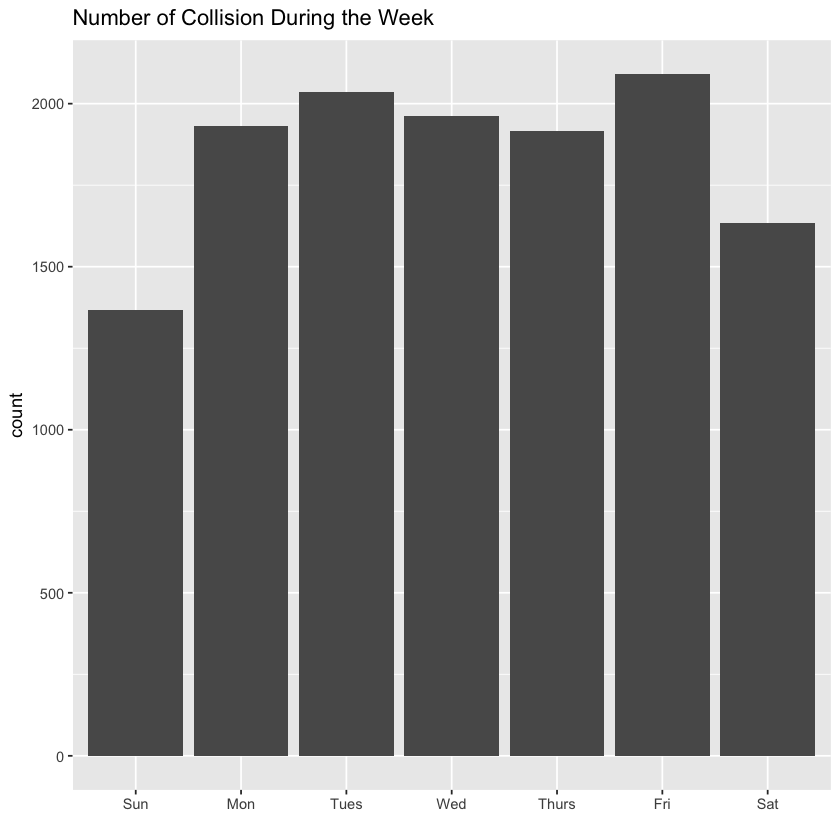

In [90]:
ggplot(ped, aes(weekday))+
geom_bar() +
ggtitle("Number of Collision During the Week") + xlab("")

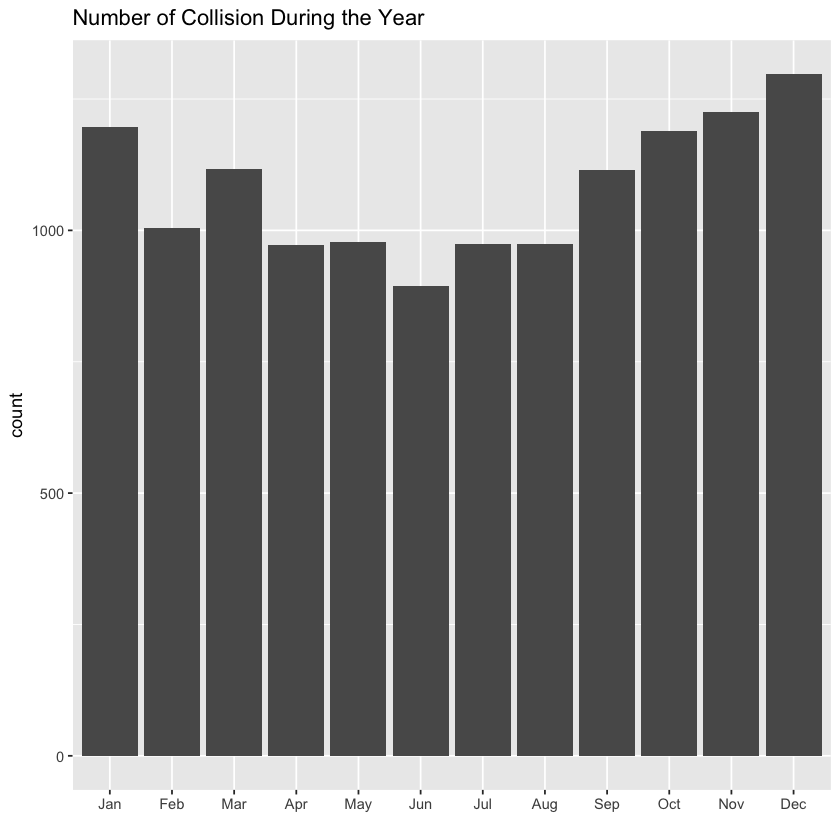

In [92]:
ped$month = month(ped$timestamp, label = T)
ggplot(ped, aes(month))+
geom_bar() +
ggtitle("Number of Collision During the Year") + xlab("")

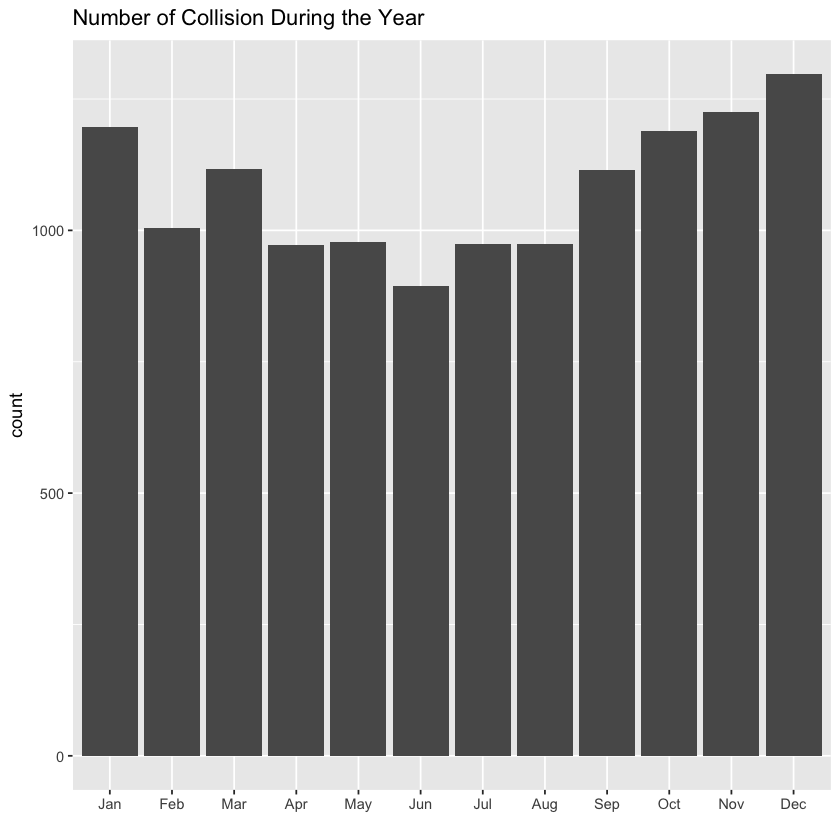

In [93]:
ggplot(ped, aes(month(timestamp, label =T)))+
geom_bar() +
ggtitle("Number of Collision During the Year") + 
xlab("")

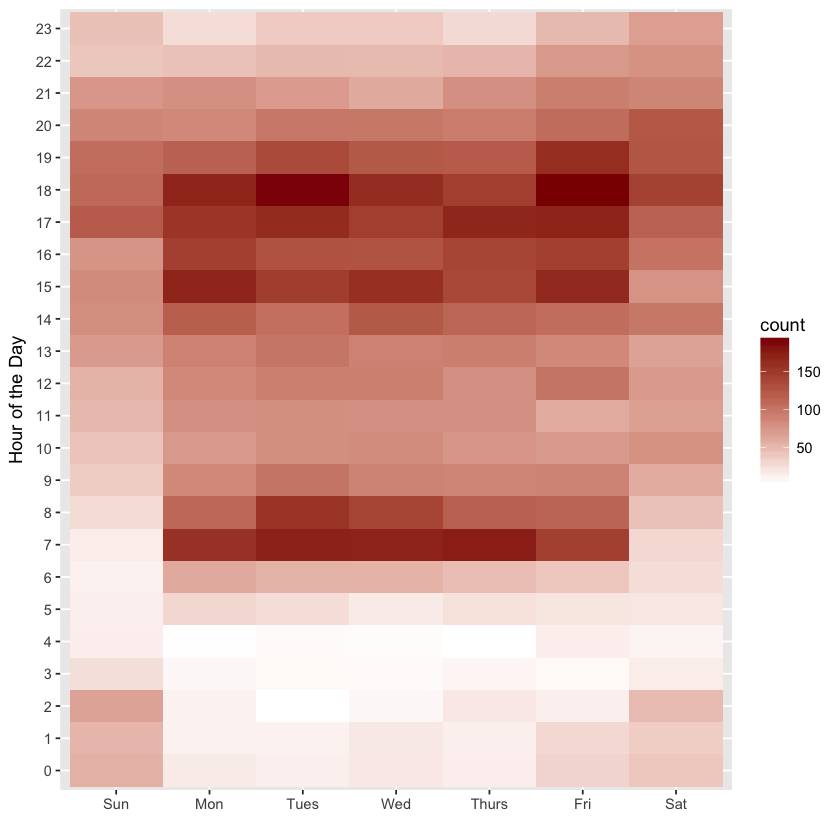

In [118]:
heatmapData = ped %>%
mutate(weekday = wday(timestamp, label = T),
hour = hour(timestamp)) %>% 
group_by(weekday, hour) %>%
summarise(count = n())

ggplot(heatmapData, aes (x = weekday, y = factor(hour), fill = count)) + 
geom_tile() +
scale_fill_gradient(low = "white", high = "darkred") +
ylab("Hour of the Day") + xlab("")

In [145]:
library(maps)
library(mapproj)

In [124]:
states_map = map_data("state")
crimes_data = USArrests
crimes_data$state = rownames(USArrests)
crimes_data$state = tolower(crimes_data$state)
crime_map = merge(x = states_map, y = crimes_data, by.x = "region", by.y = "state")

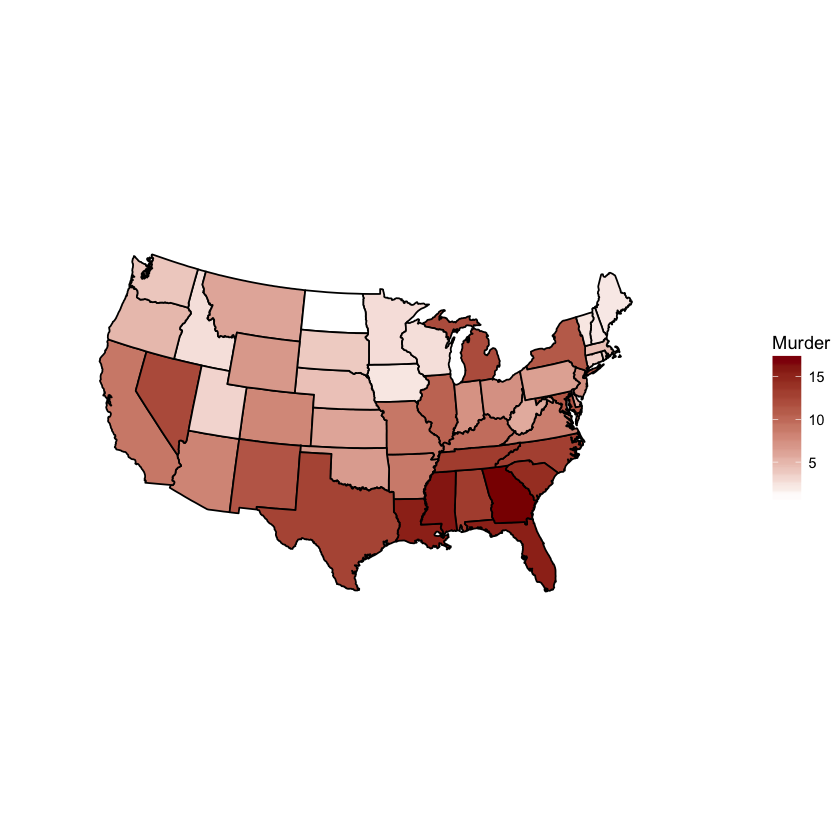

In [125]:
crime_map = merge(x = states_map, y = crimes_data, by.x = "region", by.y = "state", all.x = T)
crime_map = arrange(crime_map, group, order)
ggplot(crime_map, aes(x = long, y = lat, group = group, fill = Murder)) +
geom_polygon(color = "black") + 
scale_fill_gradient(low = "white", high = "darkred") + 
theme_void() +
coord_map("polyconic")